## **Что такое статистическая мощность?**
При проверке гипотез статистическая мощность - это вероятность обнаружения эффекта, если эффект будет обнаружен (если эффект действительно существует). Его также можно использовать в качестве инструмента для оценки количества наблюдений или размера выборки, необходимых для обнаружения эффекта в эксперименте.


## **Что такое анализ мощности?** 
Анализ мощности можно использовать для оценки минимального размера выборки, необходимого для эксперимента, с учетом желаемого уровня значимости, размера эффекта и статистической мощности.

Обычно определяют:

- Уровень значимости (α) = 0,05 (достоверность 95%)
- Статистическая мощность = 0,8 (80%)
- Размер эффекта (на основе меры d Чоэна) = 0,8 для большого размера эффекта, средний размер эффекта = 0,5, размер малого эффекта = 0,2.

Тест часто интерпретируется с использованием **p-значения ** , которое представляет собой вероятность наблюдения результата при условии, что нулевая гипотеза верна.

При интерпретации p-значения теста значимости вы должны указать уровень значимости. Результат теста значимости считается «статистически значимым», если значение p меньше уровня значимости. Это означает, что нулевая гипотеза (о том, что разницы нет) отклоняется.

- p <= alpha : отклонить H0, другое распределение
- p> alpha : не удалось отклонить H0, такое же распределение


## **Расчет анализа мощности**

### **Терминология**

##### **Независимый выборочный тест (или двухвыборочный t-тест)**

Логический статистический тест, который определяет, существует ли статистически значимая разница между средними значениями в двух несвязанных группах.
<br> Нулевая гипотеза для независимого t-критерия состоит в том, что средние по совокупности двух несвязанных групп равны:


> H0: u1 = u2


<br> Альтернативная гипотеза в таком случае будет, если средние по численности населения не равны: 
> HA: u1 ≠ u2

<br>**Что такое несвязанные группы?**

Несвязанные группы - это группы, в каждой из которых разные пользователи. Часто мы исследуем различия между людьми, что означает, что при сравнении двух групп человек в одной группе не может быть членом другой группы, и наоборот. 



##### **Парный образец теста**

Парный t-критерий используется для сравнения двух средних значений совокупности, когда у вас есть две выборки, в которых наблюдения в одной выборке могут быть объединены с наблюдениями в другой выборке. Примеры того, где это может произойти:

- Наблюдения до и после одних и тех же предметов.
- Сравнение двух разных методов измерения или двух разных видов лечения, когда измерения / лечения применяются к одним и тем же предметам.

Нулевая гипотеза для парного выборочного t-критерия состоит в том, что средняя разница между двумя наборами наблюдений (группами) равна нулю.


### **График минимального размера выборки, необходимого для обнаружения различных размеров эффекта**

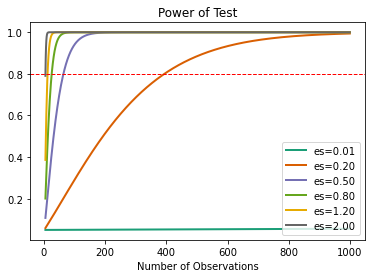

In [1]:
# рассчитать кривые мощности для различных выборок и размера
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

# параметры для анализа можности
effect_sizes = array([0.01,0.2, 0.5,0.8,1.20,2])                  # определите диапазон желаемого эффекта или используйте полный диапазон 
sample_sizes = array(range(5,1000))                               # определяем диапазон размера выборки, который хотите исследовать 

# рассчитать кривые мощности на основе нескольких анализов мощности
analysis = TTestIndPower()                                        # переход на TTestPower() в случае парного t-критерия выборки
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.axhline(y=0.8, color='r', linestyle='dashed', linewidth=1) # добовляет горизонтальную линию при power = 0.8
pyplot.show()


### **Мин. Расчет размера выборки с учетом размера эффекта, мощности и уровня значимости**

In [2]:
# оценить размер выборки с помощью анализа мощности
from statsmodels.stats.power import TTestIndPower

# параметры для анализа мощности (при необходимости изменить)
effect = 0.05 
alpha = 0.05
power = 0.8

# выполнить анализ мощности
analysis = TTestIndPower()  # переход на TTestPower() в случае парного t-критерия выборки
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)

    # nobs1 = размер выборки, количество наблюдений. Это то, что мы ищем
    # ratio = если ожидается, что обе выборки будут иметь одинаковое количество наблюдений, то соотношение будет 1.0. 
    #         если, например, ожидается, что во второй выборке будет вдвое меньше наблюдений, то соотношение будет 0.5

print('Размер образца: %.0f' % result)

Размер образца: 6280
